In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import statsmodels.api as sm
matplotlib.style.use('ggplot')
%matplotlib inline

In [84]:
data2014 = pd.read_csv('days.csv', parse_dates=['date'])
data2015 = pd.read_csv('days_2015.csv', parse_dates=['date'])
data2014['day_of_week'] = data2014['date'].apply(lambda x: x.date().weekday())
data2015['day_of_week'] = data2015['date'].apply(lambda x: x.date().weekday())
data2014['month'] = data2014['date'].apply(lambda x: x.date().month)
data2015['month'] = data2015['date'].apply(lambda x: x.date().month)
data2014 = data2014.set_index(['date'])

In [6]:
from sklearn.linear_model import LinearRegression

In [17]:
regressor = LinearRegression(normalize=True)
regressor = regressor.fit(data2014[['day_of_week','month']], data2014['count'])

In [18]:
data2015['pred'] = regressor.predict(data2015[['day_of_week','month']])

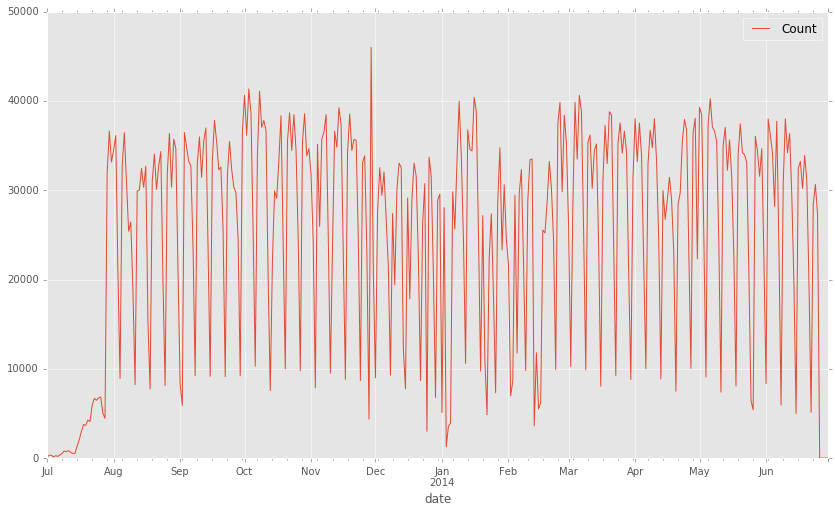

In [75]:
plt.figure(figsize=(14,8))
data2014['count'].plot(label='Count')
plt.legend()
plt.show()

In [85]:
mean = pd.rolling_mean(data2014['count'], 2)
mean = mean.reset_index(drop=True)
mean.set_value(365, mean[0])
mean = mean[1:]
data2015['predict'] = mean
data2015 = data2015.set_index(['date'])

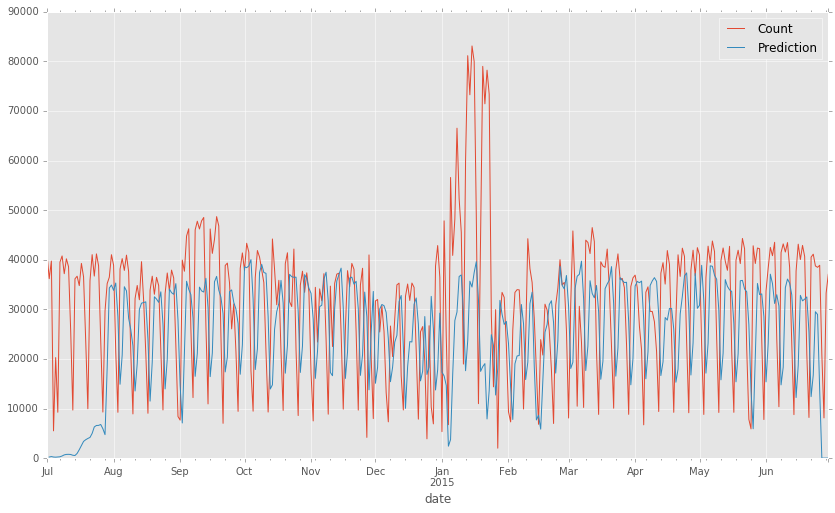

In [86]:
plt.figure(figsize=(14,8))
data2015['count'].plot(label='Count')
data2015['predict'].plot(label='Prediction')
plt.legend()
plt.show()